<table>
  <tr><td>
    <img src="h6.png">
  </td></tr>
<table>

# Latar Belakang Projek

Kartu kredit adalah salah satu kebutuhan yang mulai mudah dirasakan sebagian besar orang pada saat ini. Penggunaan kartu kredit rentan terhadap tidak kecurangan.  Contoh tindakaan kecurangan yang mungkin dilakukan adalah: Menggunakan kartu kredit orang lain, Lokasi pembelian(IP Adress) yang berbeda dengan lokasi alamat pemilik dan Bank pemilik, Waktu transaksi yang bedamaan dengan lokasi yang berbeda, dan kecurangan lainnya. Masalahnya adalah, secara umum tindak kecurangan jumlahnya relatif sangat kecil. Diperkirakan jumlah tindak kecurangan transaksi berada di bawah 0.5 % dari seluruh transaksi yang ada.

Project ini betujuan untuk membuat suatu model yang dapat mendeteksi atau menetukan secara langsung apakah suatu transaksi yang dilakukan curang atau tidak. Metode yang digunakan adalah Neural Network. Metode ini dipilih karena dikenal memiliki akurasi yang tinggi. Khususnya pada data berjumlah besar. Dataset yang digunakan pada projek ini adalah data transaksi perbankan yang telah dilabeli curang atau tida.

# Problem Statement

Buatlah model machine learning untuk meprediksi transaksi kartu kredit curang atau tidak!

# Langkah-lagkah Pemodelan Prediksi Kecurangan Kartu Kredit

1. Mengakses Dataset
2. Eksploratory Data Analysis
3. Data PreParation
4. Pemodelan
5. Evaluasi Model
6. Mengatasi Data Yang Tidak Seimbang
7. Evaluasi Model

# Mengakses Dataset

## Import Library

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Membaca Dataset

In [2]:
dataku = pd.read_csv('data_kartu_kredit.csv')
dataku.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

## Dimensi Data

In [3]:
dataku.shape

(284807, 31)

## Informasi Data Menyeluruh

In [4]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Summary Statistics

In [5]:
dataku.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Dari hasil di atas bisa dilihat terdapat bahwa kolom amuount merupakan variabel yang belum distandarisasi.

## Check Missing Value

In [6]:
dataku.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

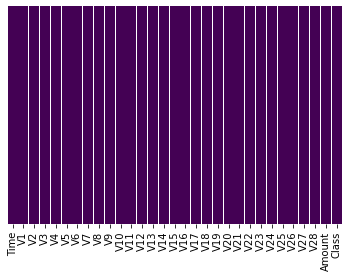

In [7]:
sns.heatmap(dataku.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Tidak Terdapat Missing Value di Semua Variabel

## Pie Plot Variable Target

In [8]:
from collections import Counter

transaksi = Counter(dataku.Class).values() 
label = ['Transaksi Normal', 'Transaksi Curang']

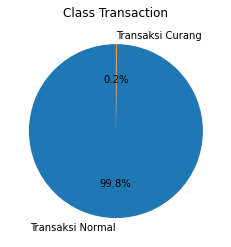

In [9]:
plt.pie(transaksi,
       labels=label,
       autopct='%1.1f%%',
       startangle=90)
plt.title('Class Transaction')

plt.show()

# Data Preparation

## Melakukan standarisasi kolom amount

In [10]:
from sklearn.preprocessing import StandardScaler
dataku['standar'] = StandardScaler().fit_transform(dataku['Amount'].values.reshape(-1,1))

In [11]:
dataku.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,standar
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


## Mendefinisikan Variabel Dependen (y) dan Independen (X)

In [12]:
y = np.array(dataku.iloc[:,-2])
X = np.array(dataku.drop(['Time', 'Amount', 'Class'],axis=1))

In [13]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [14]:
X[:1]

array([[-1.35980713, -0.07278117,  2.53634674,  1.37815522, -0.33832077,
         0.46238778,  0.23959855,  0.0986979 ,  0.36378697,  0.09079417,
        -0.55159953, -0.61780086, -0.99138985, -0.31116935,  1.46817697,
        -0.47040053,  0.20797124,  0.02579058,  0.40399296,  0.2514121 ,
        -0.01830678,  0.27783758, -0.11047391,  0.06692807,  0.12853936,
        -0.18911484,  0.13355838, -0.02105305,  0.24496426]])

## Membagi data training dan test set

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=111)

# Pemodelan

## Perancangan Model NN

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
#Input Layer
classifier.add(Dense(units=16, input_dim=29, activation='relu'))
#Hiden Layer
classifier.add(Dense(units=24, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units=20, activation = 'relu'))
classifier.add(Dense(units=24, activation = 'relu'))
#Output Layer
classifier.add(Dense(units=1, activation = 'sigmoid'))

In [17]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

## Melatih Model

In [19]:
run_model = classifier.fit(X_train, y_train,
                          batch_size=32,
                          epochs = 5, verbose = 1,
                          validation_data = (X_validate, y_validate))

Epoch 1/5
5697/5697 [==============================] - 8s 1ms/step - loss: 0.0342 - accuracy: 0.9945 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 2/5
5697/5697 [==============================] - 7s 1ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 3/5
5697/5697 [==============================] - 7s 1ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 4/5
5697/5697 [==============================] - 7s 1ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 5/5
5697/5697 [==============================] - 7s 1ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9994


In [20]:
# Melihat parameter yang disimpan
print(run_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


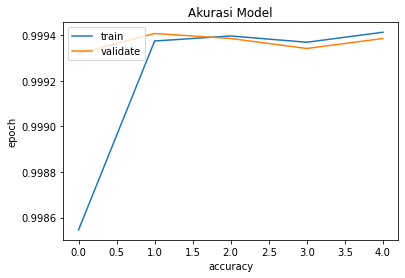

In [21]:
# Plot accuracy training dan validation set
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('Akurasi Model')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

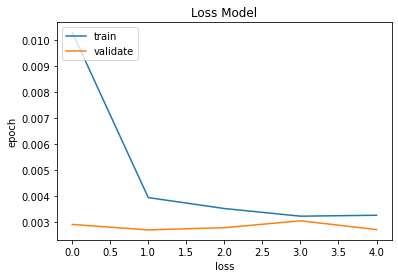

In [22]:
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

# Evaluasi Model

## Akurasi Pada Data Test

In [23]:
evaluasi=classifier.evaluate(X_test, y_test)
print('Akurasi: {:.2f}'.format(evaluasi[1]*100))

1781/1781 [==============================] - 1s 666us/step - loss: 0.0025 - accuracy: 0.9994
Akurasi: 99.94


## Confusion Matrix

In [24]:
hasil_prediksi = classifier.predict_classes(X_test)

C:\Users\Joko Eliyanto\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, hasil_prediksi)

<AxesSubplot:xlabel='Prediksi', ylabel='Akurasi'>

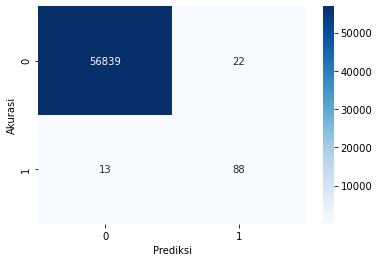

In [26]:
# Visualisai Confusion Matrix
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

## Classification Report 

In [27]:
# Membuat Classification Report 
from sklearn.metrics import classification_report
jumlah_kategori=2
target_names = ['Class {}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, hasil_prediksi, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56861
     Class 1       0.80      0.87      0.83       101

    accuracy                           1.00     56962
   macro avg       0.90      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962



**Analisis Hasil Pemodelan** :

Dari hasil Classification Report terlihat model bisa dikatakan 'terlalu pintar' pada kasus data berlabel `0` atau `tidak curang`. Ini bisa diterima karena memang contoh data yang digunakan sangat banyak sekali transaksi normal dibandingkan dengan transaksi yang curang. Alhasil diperoleh kualitas model yang berbeda pada masing-masing kelas. Dapat dilihat bahwa nilai f-score Class 0 adalah 1 sedangkan f-score pada Class 1 adalah 0,83. Hal ini bisa dimaknai sebagai bahwa model `terlalu pintar` untuk mendeteksi kasus label 0(Tidak Curang). Maka diperlukan langkah untuk memperbaiki hal ini. 

# Mengatasi Data Yang Tidak Seimbang

## Teknik Under Sampling

Teknik under sampling adalah teknik yang mengambil data secara acak pada kelompok tertentu sebanyak data pada kelompok lain yang akan dimodelkan untuk membuat data latih menjadi seimbnag. Konsep ini diilustrasikan sebgai berikut:

<table>
  <tr><td>
    <img src="Teknik Under Sampling.png">
  </td></tr>
<table>


In [28]:
# Melaukan teknik undersampling
index_fraud = np.array(dataku[dataku.Class==1].index)
n_fraud = len(index_fraud)
index_normal = np.array(dataku[dataku.Class==0].index)
index_data_normal = np.random.choice(index_normal, n_fraud, replace=False)

index_data_baru = np.concatenate([index_fraud, index_data_normal])
data_baru = dataku.iloc[index_data_baru, :]
data_baru

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,standar
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,-0.353229
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,1.761758
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0.606031
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,-0.117342
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284531,172532.0,1.962783,0.058669,-1.782488,0.549269,0.179758,-1.382780,0.324667,-0.381484,0.580134,...,0.732117,-0.064459,-0.143510,0.232354,-0.099161,-0.007762,-0.024096,50.37,0,-0.151846
215503,140101.0,-0.062133,0.882036,-0.993245,4.384693,2.448379,0.112981,0.367768,-0.241033,-2.311716,...,0.759614,-0.245735,0.262680,-0.964314,0.271246,-0.137351,0.085974,0.00,0,-0.353229
156928,109209.0,1.493492,-0.970524,-2.209076,0.148986,1.097195,1.240809,0.219669,0.125073,1.410786,...,0.214711,-0.101325,-0.942027,-0.178950,0.712184,-0.140610,-0.058658,260.40,0,0.687872
79212,57923.0,-1.493816,0.178255,0.621788,-2.601639,-0.326064,-0.756044,2.167592,-0.481970,0.863770,...,0.085671,-0.452260,-0.085663,1.204271,-0.826279,-0.128216,0.078983,255.74,0,0.669241


##  Data Preparation

In [29]:
# Mendefinisikan vari dependen (y) dan independen (X)
y_baru = np.array(data_baru.iloc[:,-2])
X_baru = np.array(data_baru.drop(['Time', 'Amount', 'Class'],axis=1))

Pada tahap perbaikan ini maka data akan dibagi menjadi dua yaitu data latih2 dan data test final. Pada data inilah teknik under sampling diterapkan. Kemudian, pada bagian data latih2 akan dibagi lagi menjadi data latih2 dan data test2. Selanjutnya  data latih dibagi lagi menjadi data latih dan data validasi. Pada bagian terakhir ini model yang baru akan dilatih. Kemudian akan dievaluasi secara internal dengan data test2. Baru untuk melihat performa model pada data yang belum diketahui(unseen), model diterapkan pada data test final.  

In [44]:
# Membagi ke train dan test set
X_train2, X_test_final, y_train2, y_test_final = train_test_split(X_baru, y_baru, test_size=0.1, random_state=111)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size=0.1, random_state=111)
X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=111)

## Pemodelan

In [31]:
# Pemodelan

from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier2 = Sequential()
#Input Layer
classifier2.add(Dense(units=16, input_dim=29, activation='relu'))
#Hiden Layer
classifier2.add(Dense(units=24, activation = 'relu'))
classifier2.add(Dropout(0.25))
classifier2.add(Dense(units=20, activation = 'relu'))
classifier2.add(Dense(units=24, activation = 'relu'))
#Output Layer
classifier2.add(Dense(units=1, activation = 'sigmoid'))
classifier2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [32]:
# Proses training model
run_model2 = classifier2.fit(X_train2, y_train2,
                          batch_size=8,
                          epochs = 5, verbose = 1,
                          validation_data = (X_validate2, y_validate2))

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 0.5243 - accuracy: 0.6378 - val_loss: 0.3582 - val_accuracy: 0.9000
Epoch 2/5
80/80 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8869 - val_loss: 0.2679 - val_accuracy: 0.9062
Epoch 3/5
80/80 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.9182 - val_loss: 0.2289 - val_accuracy: 0.9312
Epoch 4/5
80/80 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9333 - val_loss: 0.2162 - val_accuracy: 0.9250
Epoch 5/5
80/80 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9514 - val_loss: 0.2087 - val_accuracy: 0.9187


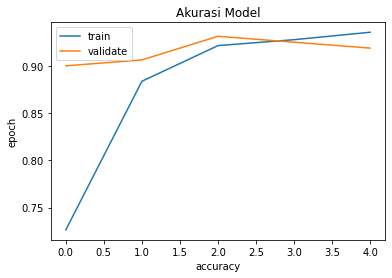

In [33]:
# Plot accuracy training dan validation set
plt.plot(run_model2.history['accuracy'])
plt.plot(run_model2.history['val_accuracy'])
plt.title('Akurasi Model')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

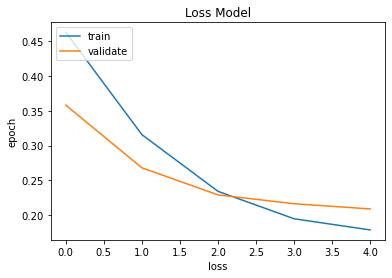

In [34]:
plt.plot(run_model2.history['loss'])
plt.plot(run_model2.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [35]:
# Mengevaluasi Model 
evaluasi2=classifier2.evaluate(X_test2, y_test2)
print('Akurasi: {:.2f}'.format(evaluasi2[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.8876
Akurasi: 88.76


In [36]:
# Memprediksi test set
hasil_prediksi2 = classifier2.predict_classes(X_test2)

C:\Users\Joko Eliyanto\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2, hasil_prediksi2)
cm2

array([[37,  4],
       [ 6, 42]], dtype=int64)

<AxesSubplot:xlabel='Prediksi', ylabel='Akurasi'>

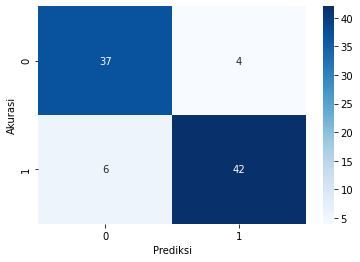

In [38]:
# Menggunakan seaborn untuk CM
cm_label2 = pd.DataFrame(cm2, columns=np.unique(y_test2),
                       index=np.unique(y_test2))
cm_label2.index.name='Akurasi'
cm_label2.columns.name='Prediksi'
sns.heatmap(cm_label2, annot=True, cmap='Blues', fmt='g')

In [39]:
# Membuat Classification Report 
from sklearn.metrics import classification_report
jumlah_kategori=2
target_names = ['Class {}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test2, hasil_prediksi2, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.90      0.88        41
     Class 1       0.91      0.88      0.89        48

    accuracy                           0.89        89
   macro avg       0.89      0.89      0.89        89
weighted avg       0.89      0.89      0.89        89



Pada hasil perbaikan ini, terlihat kita berhasil `menyeimbangkan` hasil pemodelan pada dua kelas yang sama. Selanjutnya untuk melihat performa model pada data yang belum diketahui akan dilakukan evaluasi model sebagai berikut.

# Evaluasi Model

In [40]:
# Memprediksi test set final
hasil_prediksi3 = classifier2.predict_classes(X_test_final)

In [41]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test_final, hasil_prediksi3)

<AxesSubplot:xlabel='Prediksi', ylabel='Akurasi'>

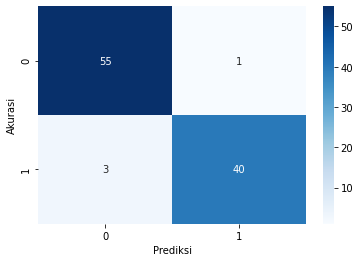

In [42]:
# Menggunakan seaborn untuk CM
cm_label3 = pd.DataFrame(cm3, columns=np.unique(y_test_final),
                       index=np.unique(y_test_final))
cm_label3.index.name='Akurasi'
cm_label3.columns.name='Prediksi'
sns.heatmap(cm_label3, annot=True, cmap='Blues', fmt='g')

In [43]:
# Membuat Classification Report 
from sklearn.metrics import classification_report
jumlah_kategori=2
target_names = ['Class {}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test_final, hasil_prediksi3, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.95      0.98      0.96        56
     Class 1       0.98      0.93      0.95        43

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99



**Analisis Hasil**:

Kita berhasil membuat model dengan f1-score yang tinggi dan relatif seimbang pada Class 0 dan Class 1. Ini berarti model sudah siap digunakan pada data real atau memasuki tahap deployment.